# Exploratory Data Analysis
## Loading libraries, training and testing data
A bank performed a marketing campaign to track and predict the user behaviour. The marketing
campaign was based on phone calls in order to assess if the product (bank term deposit) would
be subscribed ('yes') or not subscribed ('no').

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read train and test .xlsx into a pandas DataFrame
train_df = pd.read_excel('data/raw_data/train_file.xlsx')
test_df = pd.read_excel('data/raw_data/test_file.xlsx')

## Taking a first glance and plotting histograms
There are about 30.000 training but only 40 test samples in the data. 

In [2]:
print(f'Training samples {train_df.shape[0]}')
print(f'Test samples {test_df.shape[0]}')
percentage = (train_df['y'].value_counts()['yes'] / len(train_df)) * 100
print(f'Success ratio {percentage:.2f}%')

Training samples 32910
Test samples 40
Success ratio 11.26%


There are numeric (discrete & continuous) features, and categorical (binary & ordinal) features in the dataset. Y is considered as ground truth. There are unknown values. The rate of successful outcomes in the training set is 11.26%
- continuous numeric features: age, duration, (campaign?)
- categorical features: job, poutcome, contact, campaign
- binary features: housing, loan, previous, default
- ordinal features: day_of_week, month, marital, education

In [3]:
train_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,no


Lets plot histograms of all features and the target to get a feeling for the frequency distributions.
The target ration seems to be relatively evenly distributed, although we can already cautiously spot some groups with a larger fraction of successes:
- age groups around 30 and older than 60
- longer call durations
- users with a university degree
- psuccess (probably "previous" success, refering to an earlier sale or call)
- there is little "sales" acitvity in the cooler months, but the success rate seems to be a lot higher


Other findings:
- most customers in the data have not taken a loan yet
- high "activity" is in may, the lowest during winter time, no data for January - March
- in the winter time, customers are called almost exclusively via cellular.
- there seems to be no time dependence
- most have a university degree


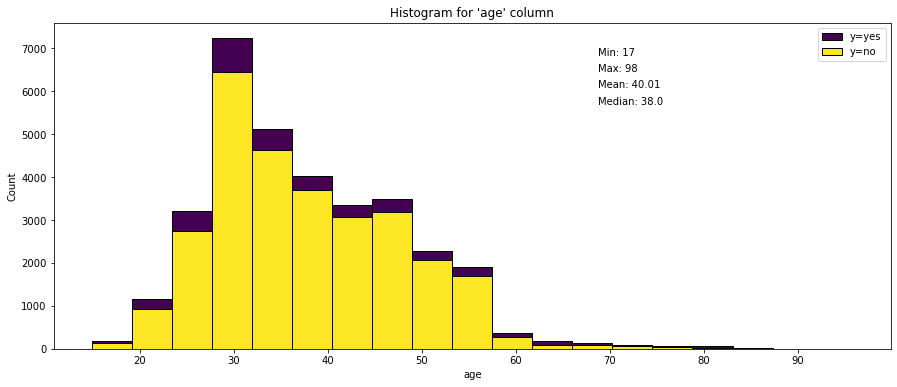

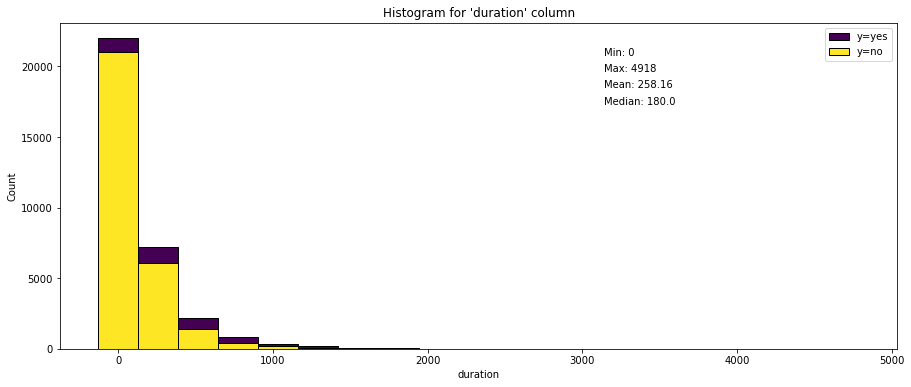

In [4]:
# Iterate over each column and plot a histogram. Keep order of x bins (age and time).
colors = plt.cm.viridis.colors
for column in train_df[["age", "duration"]]:
    plt.figure(figsize=(15, 6))
    bins = np.linspace(np.min(train_df[column]), np.max(train_df[column]), num=20)
    # Count the occurrences of y=yes and y=no within each age bin
    y0_counts, _ = np.histogram(train_df[column][train_df["y"] == "no"], bins=bins)
    y1_counts, _ = np.histogram(train_df[column][train_df["y"] == "yes"], bins=bins)
    # Plot stacked bar plot
    plt.bar(bins[:-1], y1_counts, width=np.diff(bins), bottom=y0_counts, edgecolor='black', label='y=yes', color=colors[0])
    plt.bar(bins[:-1], y0_counts, width=np.diff(bins), edgecolor='black', label='y=no', color=colors[-1])
    # Add legend and x/y axis labels.
    plt.legend()
    plt.title(f"Histogram for '{column}' column")
    plt.xlabel(column)
    plt.ylabel("Count")
    # Add statistics as text annotations
    plt.text(0.65, 0.9, f"Min: {np.min(train_df[column])}", transform=plt.gca().transAxes)
    plt.text(0.65, 0.85, f"Max: {np.max(train_df[column])}", transform=plt.gca().transAxes)
    plt.text(0.65, 0.8, f"Mean: {np.mean(train_df[column]):.2f}", transform=plt.gca().transAxes)
    plt.text(0.65, 0.75, f"Median: {np.median(train_df[column])}", transform=plt.gca().transAxes)
    plt.show()

<Figure size 1080x432 with 0 Axes>

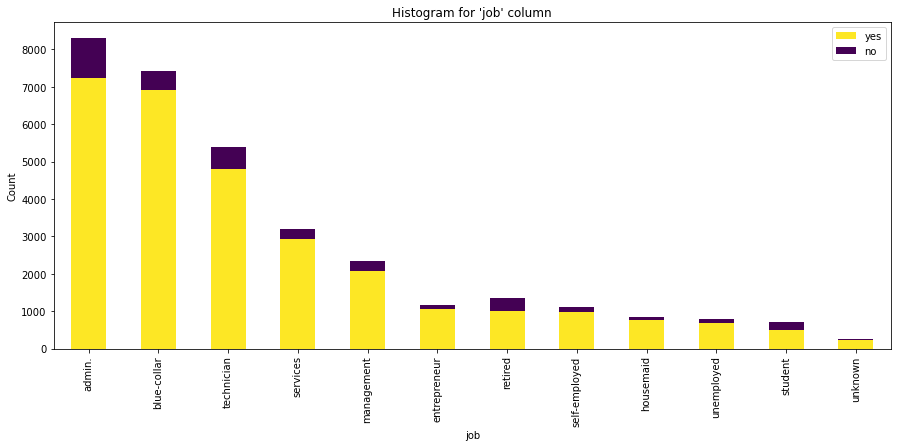

<Figure size 1080x432 with 0 Axes>

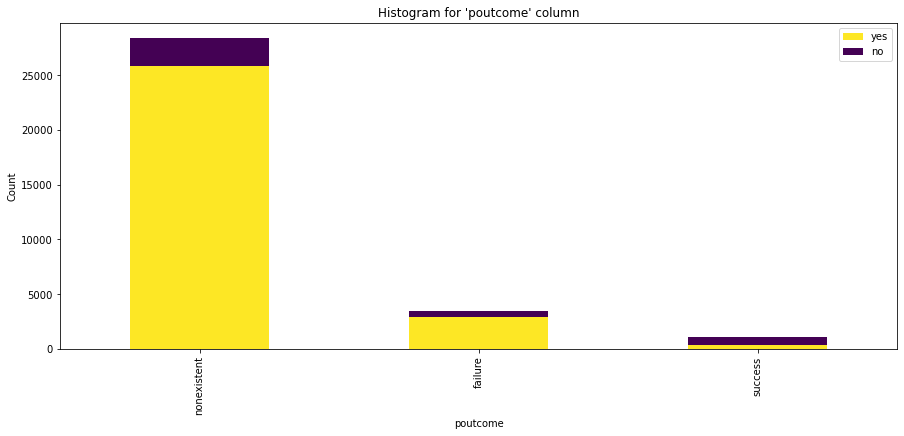

<Figure size 1080x432 with 0 Axes>

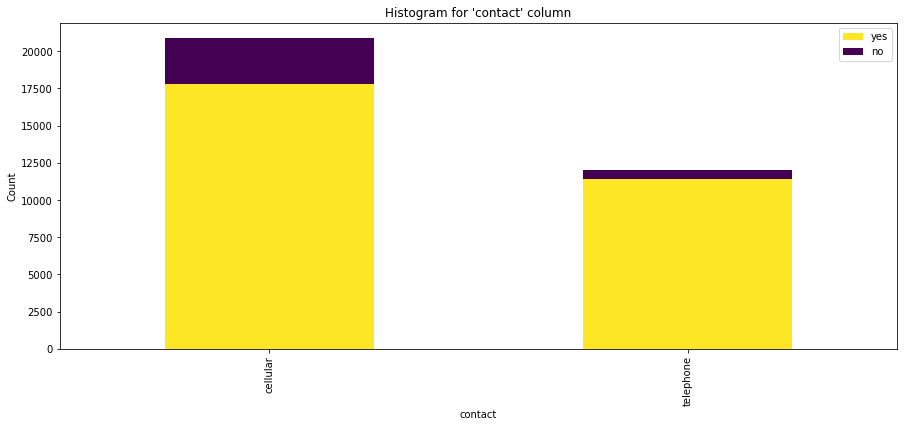

<Figure size 1080x432 with 0 Axes>

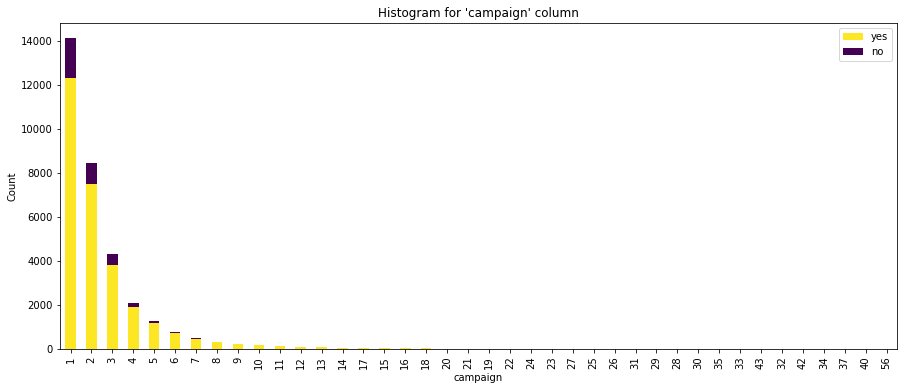

<Figure size 1080x432 with 0 Axes>

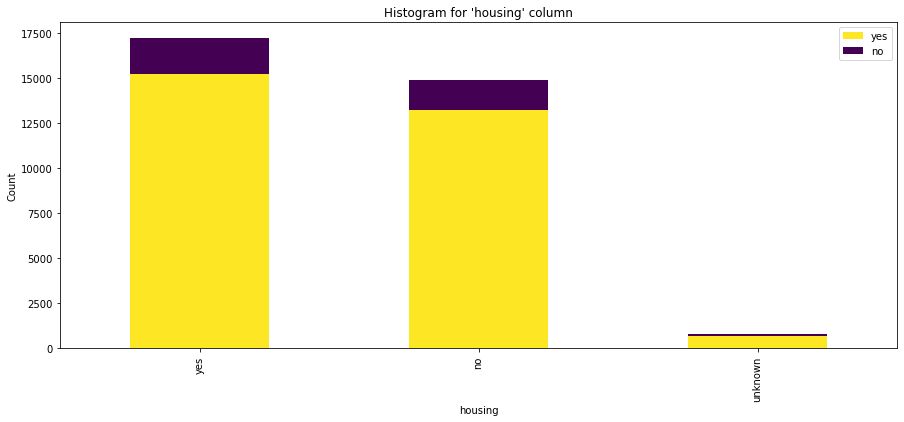

<Figure size 1080x432 with 0 Axes>

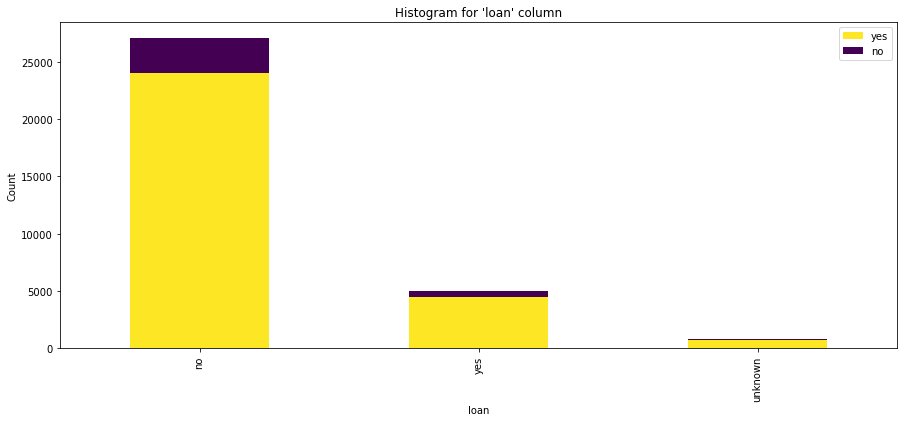

<Figure size 1080x432 with 0 Axes>

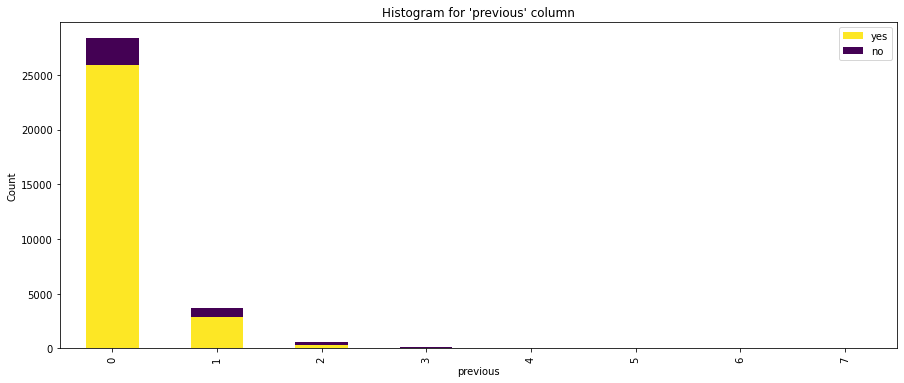

<Figure size 1080x432 with 0 Axes>

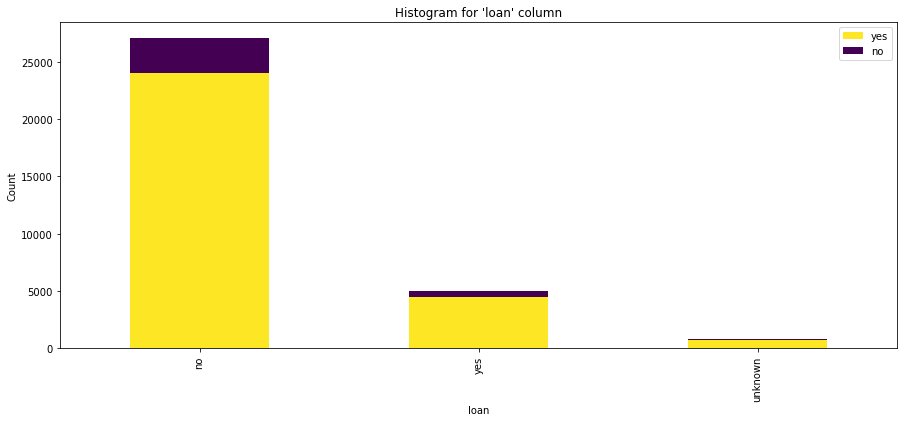

<Figure size 1080x432 with 0 Axes>

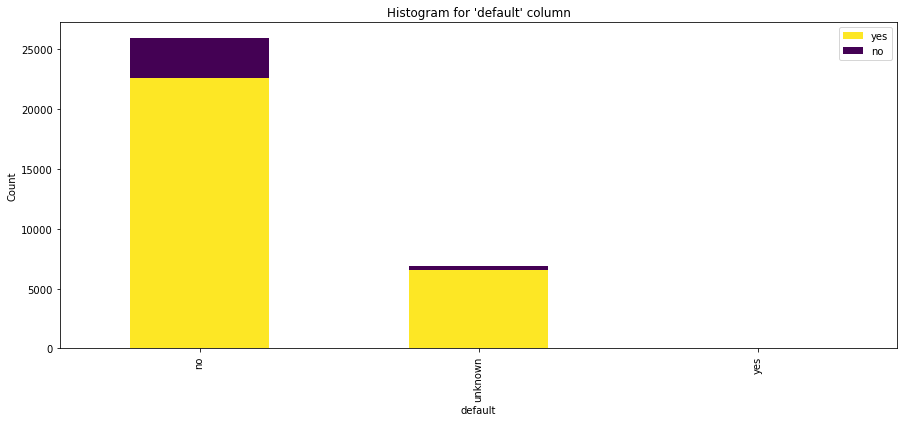

<Figure size 1080x432 with 0 Axes>

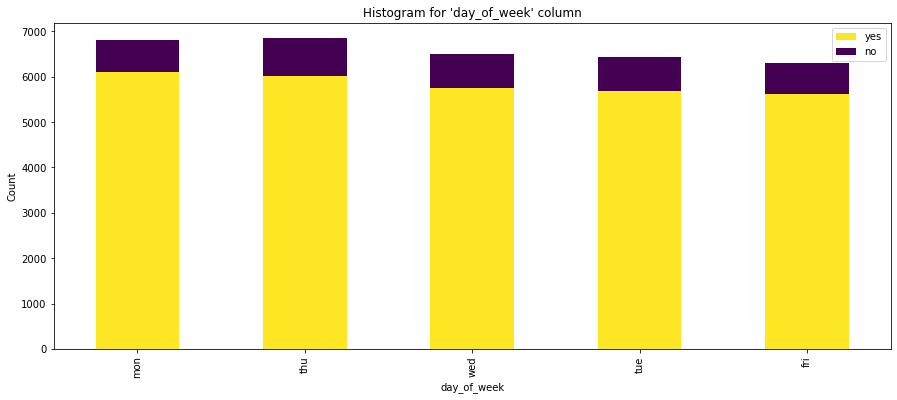

<Figure size 1080x432 with 0 Axes>

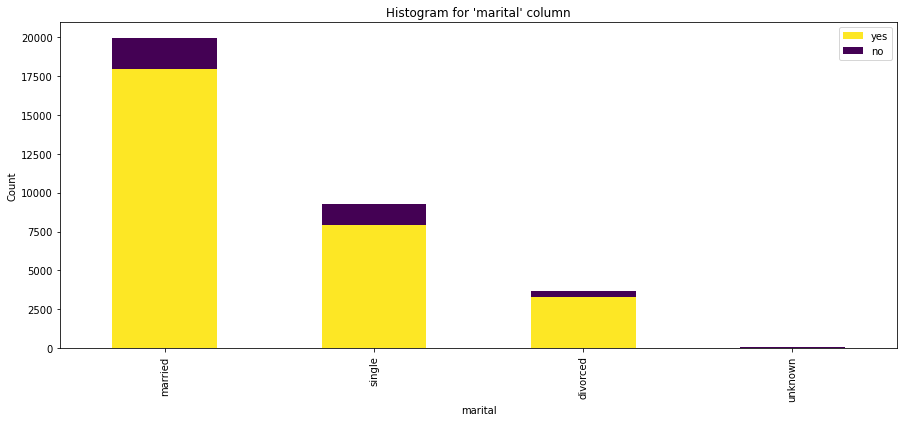

<Figure size 1080x432 with 0 Axes>

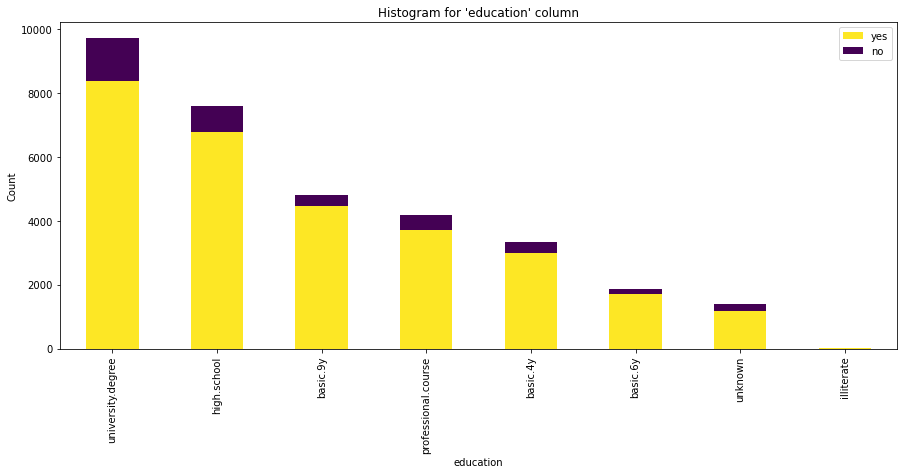

In [5]:
# Iterate over each column in the DataFrame
for column in train_df[["job", "poutcome", "contact", "campaign", "housing", "loan", "previous", "loan", "default", "day_of_week", "marital", "education"]]:
    plt.figure(figsize=(15, 6))
    counts_yes = train_df[train_df["y"] == "yes"][column].value_counts()
    counts_no = train_df[train_df["y"] == "no"][column].value_counts()
    # Stack the counts on top of each other and plot
    stacked_counts = pd.concat([counts_no, counts_yes], axis=1)
    stacked_counts.plot(kind="bar", stacked=True, figsize=(15, 6), cmap="viridis_r")
    plt.title(f"Histogram for '{column}' column")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(["yes", "no"])
    plt.show()

<Figure size 1080x432 with 0 Axes>

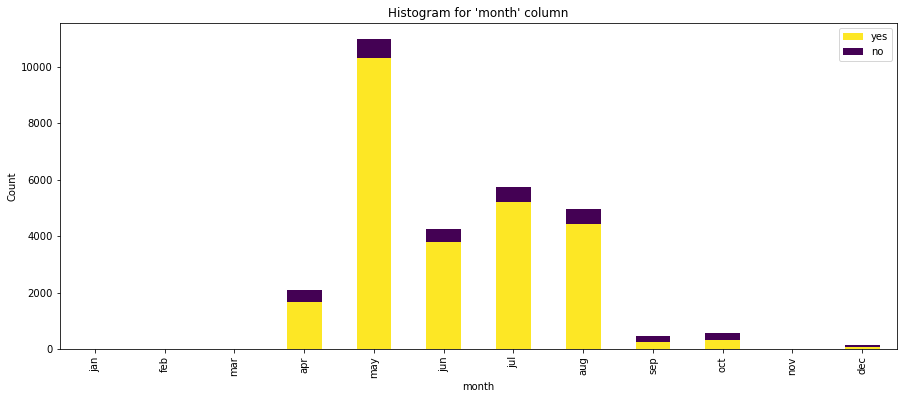

In [6]:
# Plot months in order
for column in train_df[["month"]]:
    plt.figure(figsize=(15, 6))
    counts_yes = train_df[train_df["y"] == "yes"][column].value_counts()
    counts_no = train_df[train_df["y"] == "no"][column].value_counts()
    # Stack the counts on top of each other and plot
    stacked_counts = pd.concat([counts_no, counts_yes], axis=1)
    stacked_counts.loc["nov"]=[0,0] # month does not exist in data
    stacked_counts.loc["jan"]=[0,0] # month does not exist in data
    stacked_counts.loc["feb"]=[0,0] # month does not exist in data
    stacked_counts.loc["mar"]=[0,0] # month does not exist in data
    # Custom order of months
    custom_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
    # Reorder columns based on custom order
    stacked_counts = stacked_counts.loc[custom_order]
    
    stacked_counts.plot(kind="bar", stacked=True, figsize=(15, 6), cmap="viridis_r")
    plt.title(f"Histogram for '{column}' column")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(["yes", "no"])
    plt.show()

## Preprocessing and Feature Encoding

### One-Hot Encoding
One hot encoding is generally a save way to encode features since **it does not injest any bias like order or spacing between variables into the data**. However, it adds to the dimensionality. Tree- and regression based algorithms can deal well with this embedding.

### Ordinal Feature Encoding
For ordinal features Im using a custom mapping to keep the order of features like the weekdays or months. The disadvantage is that the distances between for example "illiterate" and "basic.4y" education is not necessarily the same as "basic.4y and "6y", which is not respected in this encoding. Also, the order is only guessed with the help of OpenAIs ChatGPT, since "professional.course" could be located elsewhere in the ranking.
As a rule of thumb, for the mappings Im using "low" to "high" for example in education level. This is especially debatable in marital status, where ordering strongly depends on the context. The feature could also be encoded as a one-hot encoding, however, increasing the dimensionality and leading to less robust classifications.

This kind of feature engineering is as important as hyperparameter tuning and should be done with care. With more time, different encoding strategies should be experimented with.

**Comment**: For a future refactoring, I would plan preprocessing steps in a helper script and define them as functions that can be used for the inference pipeline, too.

In [7]:
# Define the list of columns for one-hot encoding
one_hot_cols = ['job','default', 'housing', 'loan', 'poutcome']

# Define the mapping for categorical encoding - also for the ones which are not in the dataset to keep the spacing.
category_mapping_day_of_week = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}
category_mapping_month = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}
category_mapping_education = {'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'professional.course': 5,'university.degree': 6, 'unknown': "unknown"}
category_mapping_marital = {'single': 0, 'married': 1, 'divorced': 2, 'unknown': "unknown"}
category_mapping_contact = {'telephone': 0, 'cellular': 1}

target_mapping = {"no" : 0, "yes" : 1}


# Perform one-hot encoding on training data
encoded_df = pd.get_dummies(train_df, columns=one_hot_cols)

# Perform categorical encoding
encoded_df['day_of_week'] = encoded_df['day_of_week'].map(category_mapping_day_of_week)
encoded_df['month'] = encoded_df['month'].map(category_mapping_month)
encoded_df['education'] = encoded_df['education'].map(category_mapping_education)
encoded_df['marital'] = encoded_df['marital'].map(category_mapping_marital)
encoded_df['contact'] = encoded_df['contact'].map(category_mapping_contact)
encoded_df['y'] = encoded_df['y'].map(target_mapping)



### Performing Encoding on Test Data

In [8]:
colums_excluding_y = ['age', 'marital', 'education', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'default_no', 'default_unknown', 'default_yes', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']

# Perform one-hot encoding on test data
encoded_test_df = pd.get_dummies(test_df, columns=one_hot_cols)
fill_values = {"marital": "unknown", "education": "unknown"}
encoded_test_df = encoded_test_df.reindex(columns=colums_excluding_y, fill_value=0)
encoded_test_df = encoded_test_df.fillna(fill_values)

# Perform categorical encoding on test data
encoded_test_df['day_of_week'] = encoded_test_df['day_of_week'].map(category_mapping_day_of_week)
encoded_test_df['month'] = encoded_test_df['month'].map(category_mapping_month)
encoded_test_df['education'] = encoded_test_df['education'].map(category_mapping_education)
encoded_test_df['marital'] = encoded_test_df['marital'].map(category_mapping_marital)
encoded_test_df['contact'] = encoded_test_df['contact'].map(category_mapping_contact)

# Print the transformed DataFrame
encoded_test_df.head(3)

,age,marital,education,contact,month,day_of_week,duration,campaign,previous,job_admin.,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,34,1,4,0,4,3,214,4,0,0,...,0,1,0,0,1,0,0,0,1,0
1,29,0,3,1,6,3,190,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,35,0,4,1,4,2,152,2,0,1,...,0,1,0,0,1,0,0,0,1,0


## Imputing unknown values
Columns with unknowns, that are not yet one-hot encoded: "Martial" and "Education". 
Lets impute them using KNNImputing - taking the average of the neirest n neighbours.
For the non-ordinal features, one-hot encoding of "unknowns" is already a good method, since there is no ordering and we want to keep the "unknown" information.

In [9]:
unknown_columns = encoded_df.columns[encoded_df.isin(["unknown"]).any()].tolist()
unknown_counts = encoded_df[unknown_columns].apply(lambda x: x.value_counts().get("unknown", 0))

print("Columns with 'unknown' values and their frequencies in training data:")
for column, count in unknown_counts.items():
    print(f"{column}: {count}")
    
unknown_columns_test = encoded_test_df.columns[encoded_test_df.isin(["unknown"]).any()].tolist()
unknown_counts_test = encoded_test_df[unknown_columns_test].apply(lambda x: x.value_counts().get("unknown", 0))

print("Columns with 'unknown' values and their frequencies in test data:")
for column, count in unknown_counts_test.items():
    print(f"{column}: {count}")

Columns with 'unknown' values and their frequencies in training data:
marital: 65
education: 1395
Columns with 'unknown' values and their frequencies in test data:
education: 2


There are many options for imputing. Simple ones like taking the column mean, multivariate imputation, predicting, etc. As a first try to keep it simple, Im using KNN-Imputation: Personally, I would prefer a voting mechanism instead of taking the mean, but this does not work with the Sklearn implementation which takes the mean by default. For a categorical feature, decimals are not meaningful, but could be the right thing in a tree-based classification or regression since the features are ordinal, i.e. have some order.
For the test data, its important to use the original imputer.

In [10]:
from sklearn.impute import KNNImputer
import joblib
imputer = KNNImputer(n_neighbors=5) # 5 is the default setting.

# drop the target y from the data:
X_encoded = encoded_df.replace('unknown', np.nan).drop('y', axis=1)
# fit imputer on training data:
imputed_array = imputer.fit_transform(X_encoded)
imputed_df = pd.DataFrame(imputed_array, columns=X_encoded.columns)

# Save imputer for inference time:
joblib.dump(imputer, 'models/KNNimputer.joblib')

# apply imputer to test data
imputed_test_array = imputer.transform(encoded_test_df.replace('unknown', np.nan))
imputed_test_df = pd.DataFrame(imputed_test_array, columns=encoded_test_df.columns)

# reattach y to training data:
imputed_df["y"] = encoded_df["y"]

/Users/moritz.berthold/miniconda3/envs/daiichi/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Checking time or index dependence of the target
The target and its statistics does not change over time/index, which means we can proceed with random shuffels and cross validation and do not need to take index or non-stationarity into account. I have seen this in Kaggle competitions before...

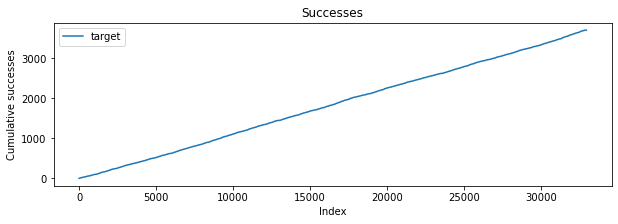

In [11]:
# Is there some trend in the data?
plt.figure(figsize=(10, 3))
plt.plot(encoded_df["y"].cumsum(), label="target")
plt.title("Successes")
plt.xlabel('Index')
plt.ylabel('Cumulative successes')
plt.legend()
plt.show()

## Correlation Plot: How do the variables correlate with each other?

Correlations with the target by absolute magnitude:
- duration
- "p_outcome_success"
- previous
- "p_outcome_nonexistent"

I interpret "p" as "previous" with relation to a previous call attempt.

Other findings:
- contact correlates with month (indication for seasonality?)
- education correlates negatively with job_blue_collar
- housing*, loan* and default* features correlate with each other - due to their one-hot encoding nature. Those features could be encoded in a binary fashion as well with "unknowns" imputed

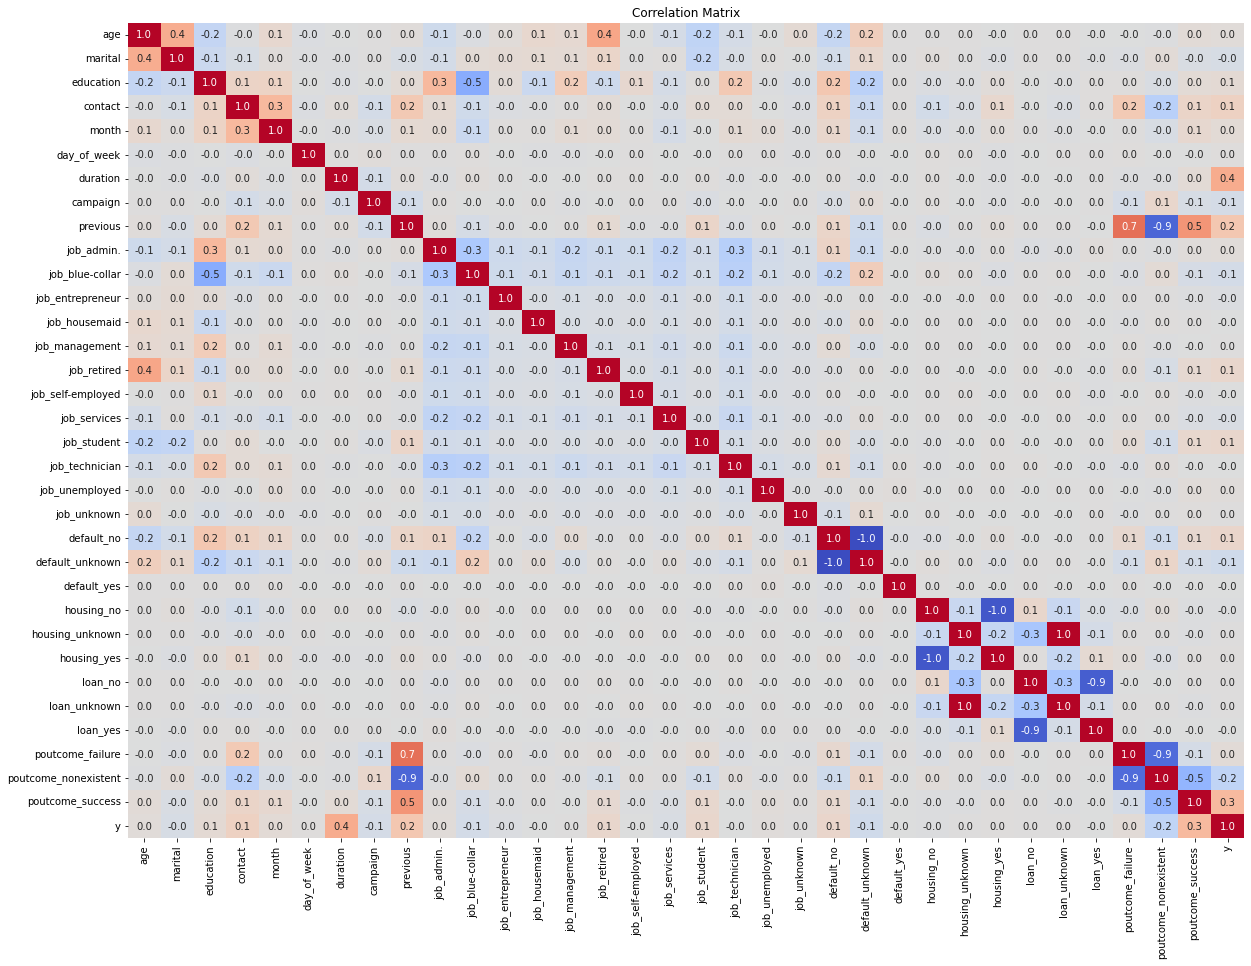

In [12]:
import seaborn as sns

# Create a correlation matrix
correlation_matrix = imputed_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 15))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", cbar=False)
plt.title('Correlation Matrix')
plt.show()

## Unsupervised Learning: How well can the data be split?

### Using tSNE for unsupervised dimensionality reduction
Lets try to visualize the data in a 2d plane. tSNE is able to reduce the dimensionality and models pairwise similar objects as nearby points and dissimilar objects by distant points. Due to its pairwise nature, it can´t be used for prediction, however, it gives a good indication of how well an algorithm can seperate the data and spot clusters. 
In the plot below, we can already see, that the "successes" displayed as yellow dots are somewhat seperatable and there are no outliers. It is my favourite algorithm ;).

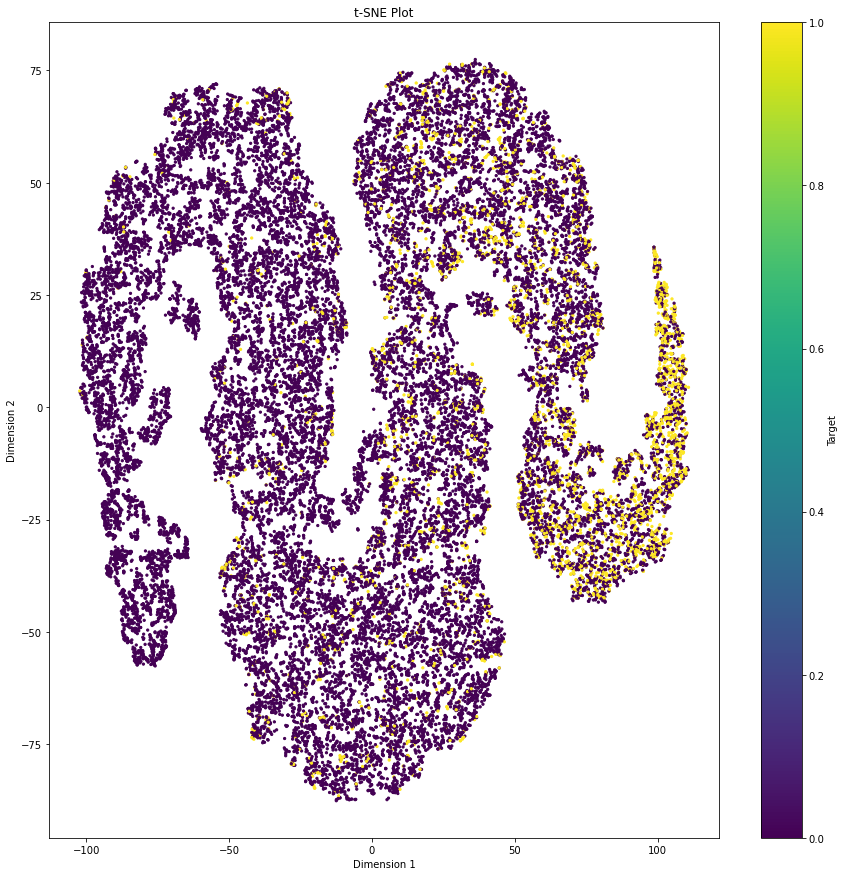

In [13]:
from sklearn.manifold import TSNE

# Separate the features from the target variable
X = imputed_df.drop('y', axis=1)
y = imputed_df['y']

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, metric="cosine")
X_tsne = tsne.fit_transform(X)

# Create a scatter plot and color the clusters based on the target variable
plt.figure(figsize=(15, 15))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=5)
plt.title('t-SNE Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

# Lets analyze winter vs. summer months and contact types

It seems like the winter success rate is twice as high 22% as the general success rate ~11%.
In the summer, calling via telephone seems to have a fairly low success rate, although it is attempted extremely often. This seems like a finding, that one could clarify with business since it could indicate an inefficient resource allocation.

Winter successe rate: 21.6%
Summer successe rate: 8.5%


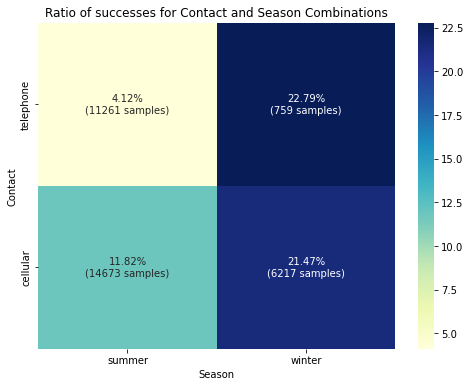

In [14]:
winter_df = imputed_df[(imputed_df['month'].isin([0,1,2,3,8,9,10,11]))]
winter_ratio = winter_df['y'].mean()
summer_df = imputed_df[(imputed_df['month'].isin([4,5,6,7]))]
summer_ratio = summer_df['y'].mean()
summer_landline_df = imputed_df[(imputed_df['contact'] == 0) & (imputed_df['month'].isin([4,5,6,7]))]
summer_landline_ratio = summer_landline_df['y'].mean()
summer_cellular_df = imputed_df[(imputed_df['contact'] == 1) & (imputed_df['month'].isin([4,5,6,7]))]
summer_cellular_ratio = summer_cellular_df['y'].mean()
print(f"Winter successe rate: {winter_ratio*100:.1f}%")
print(f"Summer successe rate: {summer_ratio*100:.1f}%")

season_mapping = {4:0,5:0,6:0,7:0, 0:1,1:1,2:1,3:1,8:1,9:1,10:1,11:1}
imputed_df['season'] = imputed_df['month'].map(season_mapping)
imputed_test_df['season'] = imputed_test_df['month'].map(season_mapping)


# Calculate the ratio of y==0 and y==1 as percentages for each combination
ratios = imputed_df.groupby(['contact', 'season'])['y'].mean() * 100

# Calculate the absolute number of samples for each combination
sample_counts = imputed_df.groupby(['contact', 'season'])['y'].count()

# Reshape the data to create a matrix-like structure
matrix = ratios.unstack()

# Plot the matrix as a heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(matrix, annot=True, fmt=".2f", cmap="YlGnBu")

# Add "%" symbol and sample counts to the annotations
for i, text in enumerate(heatmap.texts):
    percentage = text.get_text()
    sample_count = sample_counts.iloc[i]
    text.set_text(f"{percentage}%\n({sample_count} samples)")

# Customize the tick labels for the x-axis and y-axis
contact_labels = ['telephone', 'cellular']
month_labels = ['summer', 'winter']
plt.xticks(ticks=[0.5, 1.5], labels=month_labels, ha='center')
plt.yticks(ticks=[0.5, 1.5], labels=contact_labels, va='center')
plt.title('Ratio of successes for Contact and Season Combinations')
plt.xlabel('Season')
plt.ylabel('Contact')
plt.show()

# Adding tSNE Dimensions as Features:

In [15]:
#imputed_df_tSNE = imputed_df
#imputed_df_tSNE["tSNE_1"] = X_tsne[:,0]
#imputed_df_tSNE["tSNE_2"] = X_tsne[:,1]

# Saving the Dataframes

In [16]:
imputed_df.to_csv('data/preprocessed_data/imputed_data.csv', index=False)
# imputed_df_tSNE.to_csv('data/preprocessed_data/imputed_data_tsne.csv', index=False)
imputed_test_df.to_csv('data/preprocessed_data/imputed_test_data.csv', index=False)


# Graveyard: Customer Segmentation and Clustering based on "social" and "process" oriented features using K-Means

In [17]:
social_features = imputed_df[['age','job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital', 'housing_no', 'housing_unknown', 'housing_yes']]
process_features = imputed_df[['contact', 'month', 'day_of_week',
       'duration', 'campaign', 'previous', 'default_no', 'default_unknown', 'default_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']]